**Import required libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from hyper_surrogate.deformation_gradient import DeformationGradientGenerator
from hyper_surrogate.kinematics import Kinematics as K

In [2]:
def create_dataframe(f):
    # initialize the kinematics calculator
    kk = K()
    pstr = kk.principal_stretches(f)
    return pd.DataFrame({
        "I1": kk.invariant1(f),
        "I2": kk.invariant2(f),
        "I3": kk.invariant3(f),
        "Max Principal Stretch": np.max(pstr, axis=1),
        "Min Principal Stretch": np.min(pstr, axis=1),
    })


def plot_invariants_distribution(df):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # with probs instead of counts. kernel density estimation. bars without outline
    sns.histplot(df["I1"], kde=True, stat="probability", color="blue", alpha=0.5, legend=True)
    # overlap I2 plot
    sns.histplot(df["I2"], kde=True, stat="probability", color="red", alpha=0.5, legend=True)
    # add legend
    plt.legend(["I1", "I2"])
    plt.xlabel("value")
    plt.subplot(1, 2, 2)
    # I1-I2 plot
    sns.scatterplot(x="I1", y="I2", data=df, alpha=0.5, color="black")
    # label axes only subplot 2
    plt.xlabel("I1")
    plt.ylabel("I2")
    plt.tight_layout()
    plt.show()

**Define the number of test cases**

In [9]:
SIZE = 1000

**Generate N random Deformation Gradients**

In [10]:
f = DeformationGradientGenerator(seed=42, size=SIZE).generate()
f.shape

(1000, 3, 3)

With the deformation gradients generated, we can calculate a few kinematic quantities that may useful as simulation data for a machine learning model. 

Current `DeformationGradientGenerator` can directly calculate the following quantities:

- Invariants of the deformation gradient tensor: $I_1 = \text{tr}(\mathbf{F}), I_2 = \frac{1}{2}(\text{tr}(\mathbf{F})^2 - \text{tr}(\mathbf{F}^2)), I_3 = \text{det}(\mathbf{F})$

- Left Cauchy-Green tensor: $\mathbf{B} = \mathbf{F}^T\mathbf{F}$

- Right Cauchy-Green tensor: $\mathbf{C} = \mathbf{F}\mathbf{F}^T$

- Principal stretches (Sqrt of Eigenvalues of $\mathbf{C}$): $\lambda_1, \lambda_2, \lambda_3$

- Principal directions: $\mathbf{n}_1, \mathbf{n}_2, \mathbf{n}_3$

- Right Stretch tensor: $\mathbf{U} = \mathbf{F}\mathbf{F}^T$

- Left Stretch tensor: $\mathbf{V} = \mathbf{F}^T\mathbf{F}$

- Rotation tensor: $\mathbf{R} = \mathbf{F}\mathbf{U}^{-1}$

In [4]:
# drop selected quantities into a dataframe
df = create_dataframe(f)
df.head()

,I1,I2,I3,Max Principal Stretch,Min Principal Stretch
0,3.555173,3.702095,1.0,2.068815,0.417534
1,7.886864,6.119132,1.0,7.092200,0.229114
2,7.291135,6.003618,1.0,7.910614,0.183201
3,4.053322,4.221559,1.0,2.845594,0.305125
4,3.532698,3.637500,1.0,1.912890,0.367945


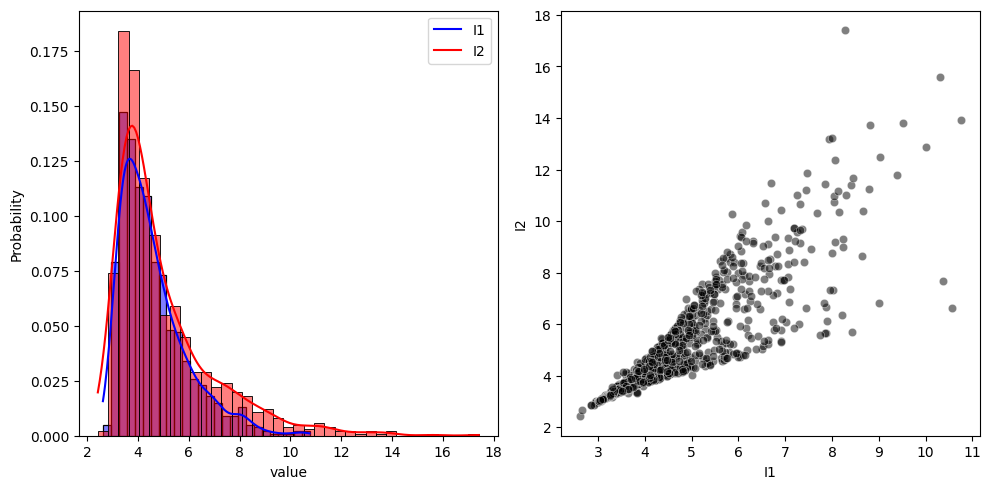

In [5]:
plot_invariants_distribution(df)

**Generate N random Uniaxial Deformation Gradients**

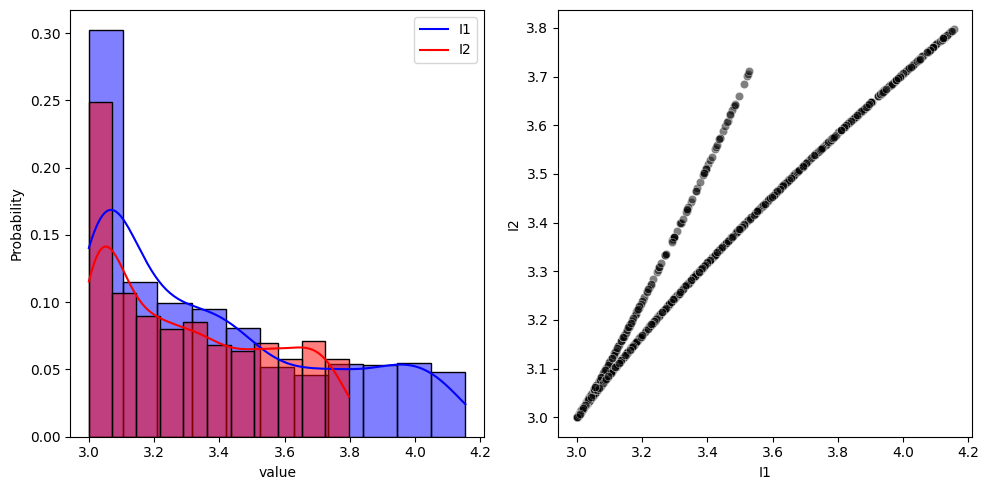

In [6]:
f_uni = DeformationGradientGenerator(seed=42, size=SIZE).generate(mode="uniaxial")
df_uni = create_dataframe(f_uni)
plot_invariants_distribution(df_uni)

**Generate N random Equibiaxial Deformation Gradients**

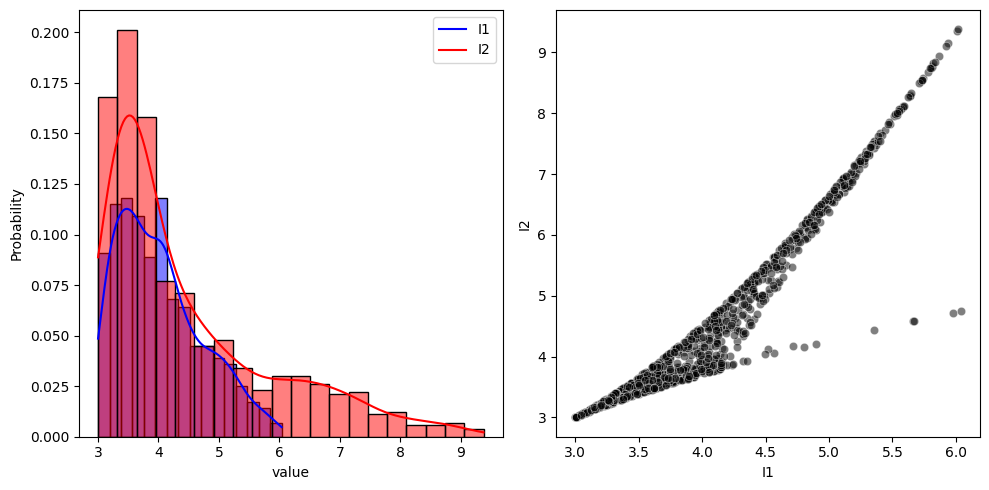

In [7]:
f_biaxial = DeformationGradientGenerator(seed=42, size=SIZE).generate(mode="biaxial")
df_biaxial = create_dataframe(f_biaxial)
plot_invariants_distribution(df_biaxial)